In [243]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
%matplotlib inline

In [293]:
r = requests.get('https://api.leju.com.tw/api/region_price/subarea/mapRadiusData/?year=1&house_age=all&latN=22.85&latS=22.5&lngW=120&lngE=120.5')

In [294]:
original_map_json = json.loads(r.text)
original_map_json

{'data': [{'sid': 10824,
   'small_area_name': '高雄新市鎮第二期',
   'city': '高雄市',
   'city_code': 'E',
   'area': '燕巢區,橋頭區',
   'post_code': '824,825',
   'avg_price': 0,
   'ratio': 0,
   'lat': '22.761641601937235',
   'lng': '120.32655715942384',
   'distance': 1737.2823507082985,
   'json_area_lat_long': '[{"lat":22.771365045818165,"lng":120.30576185672547},{"lat":22.77140590107112,"lng":120.30760221881793},{"lat":22.77087672364405,"lng":120.31456822995099},{"lat":22.77126129911826,"lng":120.3192609222606},{"lat":22.774696694050238,"lng":120.32976613962093},{"lat":22.779538838020258,"lng":120.34053464303726},{"lat":22.77041700536846,"lng":120.34496231004596},{"lat":22.770378159267462,"lng":120.34486017655581},{"lat":22.77027315591152,"lng":120.3448065952398},{"lat":22.76968344884003,"lng":120.34460980910809},{"lat":22.769585333145542,"lng":120.34439546288924},{"lat":22.769367953882735,"lng":120.34411836764777},{"lat":22.769253994107792,"lng":120.34352690912786},{"lat":22.769086918626563

In [295]:
legi_crawler = pd.DataFrame(columns=col_name)
area_list = list(list(original_map_json.values())[0])
for i in range(len(area_list)):
    legi_crawler.loc[i]=list(list(original_map_json.values())[0][i].values())
legi_crawler['geometry_xy'] = ''    
legi_crawler_point = legi_crawler    
legi_crawler.head()
print(len(legi_crawler))

75


In [296]:
def polygon_generator(polygon_xy):
    polygon=[]
    for i in range(len(eval(polygon_xy))):#
        polygon.append(list(list(eval(polygon_xy))[i].values())[::-1])
    return polygon

In [297]:
for i in range(len(legi_crawler['json_area_lat_long'])):
    poly_xy_shape = polygon_generator(legi_crawler['json_area_lat_long'][i])
    legi_crawler['geometry_xy'].loc[i]=poly_xy_shape
    
legi_crawler['geometry_xy'] = legi_crawler['geometry_xy'].apply(Polygon)

C:\Users\jerry\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [298]:
legi_crawler

,sid,small_area_name,city,city_code,area,post_code,avg_price,ratio,lat,lng,distance,json_area_lat_long,small_area_status,geometry_xy
0,10824,高雄新市鎮第二期,高雄市,E,"燕巢區,橋頭區","824,825",0,0,22.761641601937235,120.32655715942384,1737.282351,"[{""lat"":22.771365045818165,""lng"":120.305761856...",2,POLYGON ((120.30576185672547 22.77136504581816...
1,10825,橋頭車站生活圈,高雄市,E,橋頭區,825,19.32,54.81,22.75877560656881,120.3062152862549,4857.703763,"[{""lat"":22.75070069096608,""lng"":120.3159018012...",1,POLYGON ((120.31590180122294 22.75070069096608...
2,10826,高雄新市鎮,高雄市,E,"楠梓區,橋頭區","811,825",19.39,17.80,22.73859692635643,120.3117084503174,1887.812969,"[{""lat"":22.749900474921464,""lng"":120.314092996...",1,POLYGON ((120.31409299699591 22.74990047492146...
3,10827,大社市區生活圈,高雄市,E,大社區,815,17.90,35.91,22.727355779999787,120.35127639770509,3188.682307,"[{""lat"":22.731920133288924,""lng"":120.340183661...",1,POLYGON ((120.34018366131933 22.73192013328892...
4,10828,仁武市區生活圈,高雄市,E,仁武區,814,12.82,50.12,22.698846194268217,120.35149379323113,2460.025618,"[{""lat"":22.70602087890686,""lng"":120.3424707055...",2,POLYGON ((120.34247070550921 22.70602087890686...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,11168,鳳山國中生活圈,高雄市,E,鳳山區,830,20.43,21.61,22.628203758251843,120.37384986877443,1185.358103,"[{""lat"":22.633297031398435,""lng"":120.367769279...",1,POLYGON ((120.36776927949178 22.63329703139843...
71,11169,鳥松市區生活圈,高雄市,E,鳥松區,833,18.90,11.70,22.656269946393355,120.36279455496698,374.050411,"[{""lat"":22.66379568597694,""lng"":120.3576598015...",1,POLYGON ((120.35765980157524 22.66379568597694...
72,11209,高雄大學特區,高雄市,E,"楠梓區,橋頭區","811,825",20.28,18.46,22.72995307437647,120.28528812574226,1206.994422,"[{""lat"":22.733803809761763,""lng"":120.276364985...",1,POLYGON ((120.27636498540235 22.73380380976176...
73,11249,八德生活圈,高雄市,E,仁武區,814,19.66,12.47,22.689251022695736,120.34339869034483,1751.950047,"[{""lat"":22.687416762360357,""lng"":120.338916778...",1,POLYGON ((120.33891677856447 22.68741676236035...


<AxesSubplot:>

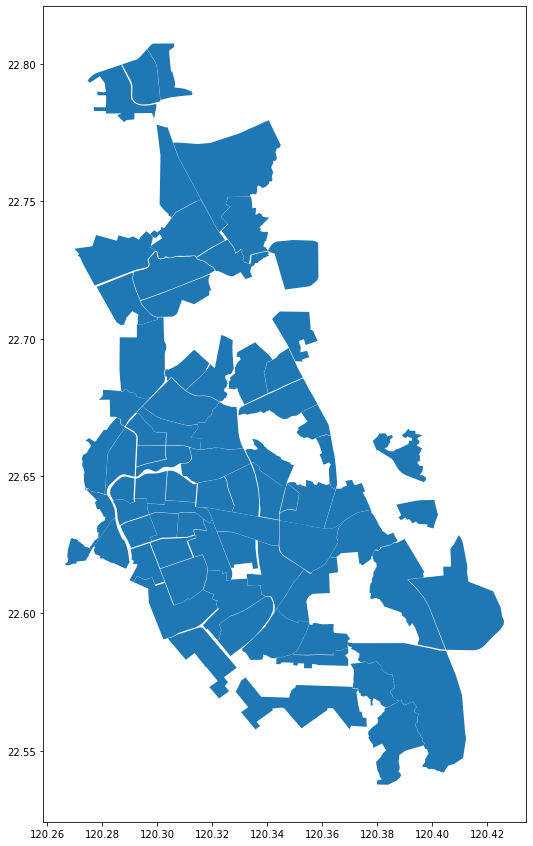

In [307]:
legi_shape = gpd.GeoDataFrame(legi_crawler, geometry=legi_crawler['geometry_xy'])
legi_shape.drop('geometry_xy',axis=1,inplace=True)
legi_shape.set_crs(epsg=3826, inplace=True)
legi_shape['geometry'].plot(figsize=(15,15))

<AxesSubplot:>

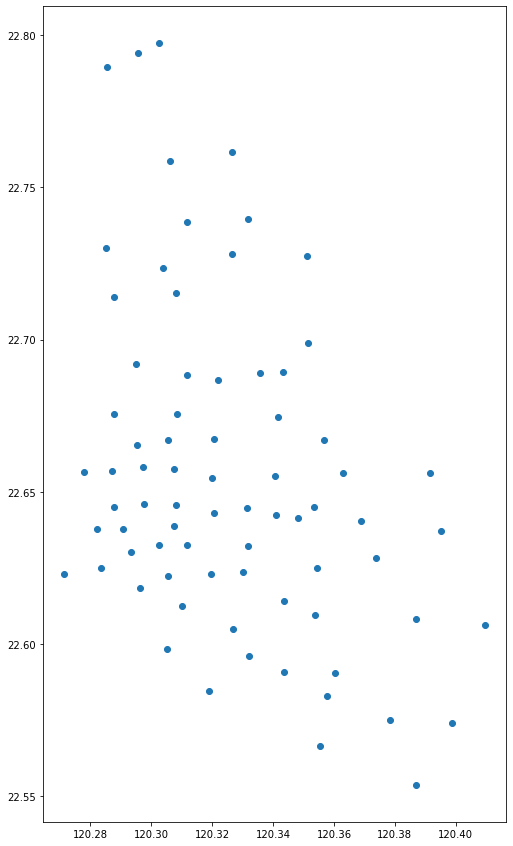

In [300]:
legi_crawler_point.lng = legi_crawler_point.lng.astype('float64')
legi_crawler_point.lat = legi_crawler_point.lat.astype('float64')
geom = [Point(xy) for xy in zip(legi_crawler_point['lng'], legi_crawler_point['lat'])]
legi_point.set_crs(epsg=3826, inplace=True)
legi_point = gpd.GeoDataFrame(legi_crawler_point, geometry=geom)
legi_point.plot(figsize=(15,15))

<AxesSubplot:>

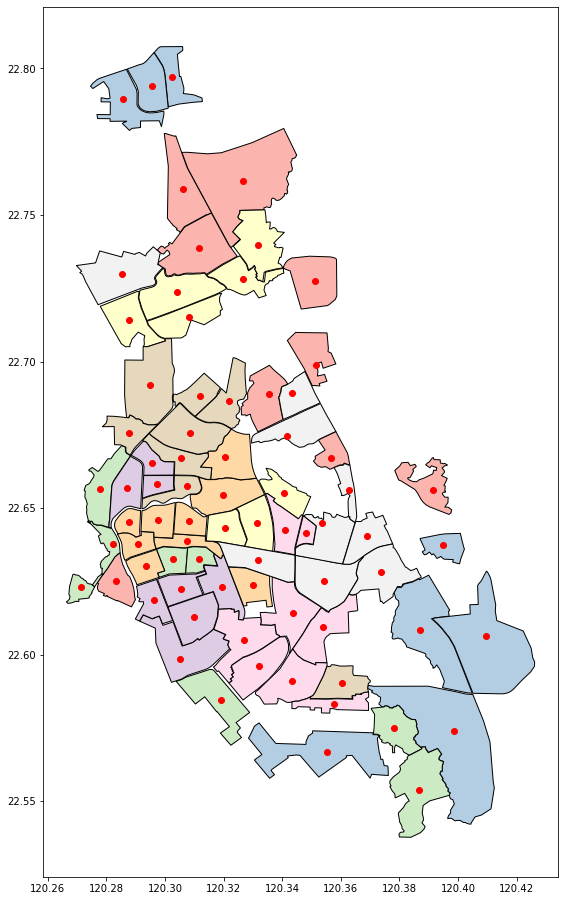

In [301]:
fig, ax = plt.subplots(figsize = (14,16)) 
legi_shape['geometry'].plot(cmap='Pastel1',edgecolor='k',linewidth = 1,ax=ax)
legi_point.plot(color='r',marker='o',ax=ax)

In [309]:
legi_shape.to_file("KH_legi.shp",encoding='utf-8')

C:\Users\jerry\AppData\Local\Temp/ipykernel_26628/4029563884.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  legi_shape.to_file("KH_legi.shp",encoding='utf-8')
